<a href="https://colab.research.google.com/github/MTracchia/Laboratorio-de-Datos/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolución de la ejercitación número 1 de labo de datos...

In [ ]:
#Importo paquetes y cargo los paths de los .csv's
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# path OCEAN
filename_ocean = '/content/drive/My Drive/LaboDatos2021/ocean_safe.csv' 
# path Coronadelicos
filename_corona = '/content/drive/My Drive/LaboDatos2021/coronadelicos_safe.csv' 

Mounted at /content/drive


In [ ]:
#PASO 1: Cargo los dataframes y los uno descartando los sujetos que no participaron en ambos experimentos
df_ocean = pd.read_csv(filename_ocean)
df_corona = pd.read_csv(filename_corona)
df_merge = pd.merge(df_ocean,df_corona,how='inner',on='hash')

print(df_merge)

      0_1  0_2  ...  13_login_disclaimer_fork         timestamp_y
0       4    5  ...                         2  10/4/2020 20:43:47
1       4    3  ...                         2  10/5/2020 13:23:33
2       5    5  ...                         2  14/4/2020 15:39:08
3       4    4  ...                         2  25/5/2020 16:19:54
4       5    3  ...                         2  11/4/2020 13:21:43
...   ...  ...  ...                       ...                 ...
8231    5    5  ...                         2  23/3/2021 20:02:22
8232    5    4  ...                         2  24/3/2021 19:00:11
8233    3    1  ...                         2  24/3/2021 23:18:10
8234    4    4  ...                         2  25/3/2021 12:08:05
8235    1    2  ...                         2  25/3/2021 12:47:27

[8236 rows x 196 columns]


In [ ]:
#PASO 2: Armo los dataframes - campos: '7_marihuana', '7_sedativos', '7_antidepresivos o antipsicoticos'

#Sujetos que reportaron haber consumido marihuana al menos una vez.(df_M)
df_M = df_merge.loc[(df_merge['7_marihuana'] != -999)]

#Sujetos que nunca consumieron marihuana.(df_NM)
df_NM = df_merge.loc[df_merge['7_marihuana'] == -999]

#Sujetos que reportaron haber consumido sedativos y/o antidepresivos o antipsicóticos.(df_DP)
df_DP = df_merge.loc[(df_merge['7_sedativos'] != -999) | (df_merge['7_antidepresivos o antipsicoticos'] != -999)]


print("Sujetos que reportaron haber consumido marihuana al menos una vez.")
print(df_M)
print("\n")
print("Sujetos que nunca consumieron marihuana.")
print(df_NM)
print("\n")
print("Sujetos que reportaron haber consumido sedativos y/o antidepresivos o antipsicóticos.")
print(df_DP)


Sujetos que reportaron haber consumido marihuana al menos una vez.
      0_1  0_2  ...  13_login_disclaimer_fork         timestamp_y
0       4    5  ...                         2  10/4/2020 20:43:47
2       5    5  ...                         2  14/4/2020 15:39:08
4       5    3  ...                         2  11/4/2020 13:21:43
5       4    5  ...                         2   9/4/2020 20:40:16
6       4    1  ...                         2  10/4/2020 11:06:49
...   ...  ...  ...                       ...                 ...
8230    3    5  ...                         2  21/3/2021 23:04:50
8231    5    5  ...                         2  23/3/2021 20:02:22
8233    3    1  ...                         2  24/3/2021 23:18:10
8234    4    4  ...                         2  25/3/2021 12:08:05
8235    1    2  ...                         2  25/3/2021 12:47:27

[5182 rows x 196 columns]


Sujetos que nunca consumieron marihuana.
      0_1  0_2  ...  13_login_disclaimer_fork         timestamp_y
1    

In [ ]:
#PASO 3: dataframes que contienen columnas para las 5 dimensiones de la personalidad.
columnas = ['1_extraversion', '1_agreeableness', '1_conscientiousness', '1_neuroticism', '1_openness']
df_M_dims = df_M[columnas].copy()
df_NM_dims = df_NM[columnas].copy()
df_DP_dims = df_DP[columnas].copy()


print(df_M_dims)
print(df_NM_dims)
print(df_DP_dims)

      1_extraversion  1_agreeableness  ...  1_neuroticism  1_openness
0                 34               40  ...              8          38
2                 32               28  ...             30          38
4                 25               31  ...             31          49
5                 28               30  ...             26          27
6                 28               40  ...             24          37
...              ...              ...  ...            ...         ...
8230              22               27  ...             22          41
8231              26               31  ...             30          45
8233              21               40  ...             24          29
8234              23               37  ...             20          37
8235              26               32  ...             19          25

[5182 rows x 5 columns]
      1_extraversion  1_agreeableness  ...  1_neuroticism  1_openness
1                 28               31  ...             19        

Valor máximo del dataframe:39.24913892078071


                    1_extraversion  1_agreeableness  ...  1_neuroticism  1_openness
Marihuana                 0.658511         0.829971  ...       0.663035    0.991568
No marihuana              0.650622         0.838030  ...       0.658164    0.965847
Drogas prescriptas        0.650866         0.820219  ...       0.719944    1.000000

[3 rows x 5 columns]


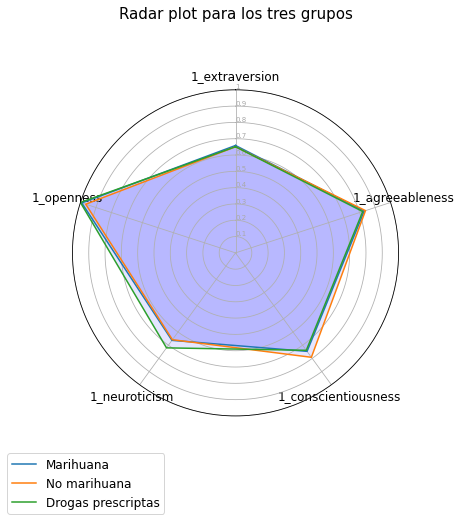

In [ ]:
#PASO 4: RADAR PLOT

import numpy as np
import matplotlib.pyplot as plt

def radar_plot(df, title = '',):
    categories = df.columns
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
     
    # Initialise the spider plot
    fig, ax = plt.subplots(figsize = (6,6), subplot_kw = {'projection': 'polar'})
     
    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
     
    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories,
                       fontsize = 12)
     
    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax.set_yticklabels(["0.1","0.2","0.3","0.4","0.5","0.6", "0.7", "0.8", "0.9", "1"],
                       color = "darkgrey",
                       size = 7)
    ax.set_ylim(0,1)
    
    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    for row in df.iloc:
            values = row.values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1.5, linestyle = 'solid',label=row.name)
            ax.fill(angles, values, 'b', alpha=0.1)
    # Add legend
    ax.legend(loc=(-0.2,-0.3),fontsize=12)
    ax.set_title(title, position=(.5, 1.2),fontsize=15,)



#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#Construyo un dataframe con las cinco columnas y los valores promedio
datos_dict =  {'1_extraversion': [df_M_dims['1_extraversion'].mean(), df_NM_dims['1_extraversion'].mean(), df_DP_dims['1_extraversion'].mean()],
               '1_agreeableness':[df_M_dims['1_agreeableness'].mean(), df_NM_dims['1_agreeableness'].mean(), df_DP_dims['1_agreeableness'].mean()],
               '1_conscientiousness':[df_M_dims['1_conscientiousness'].mean(), df_NM_dims['1_conscientiousness'].mean(), df_DP_dims['1_conscientiousness'].mean()],
               '1_neuroticism':[df_M_dims['1_neuroticism'].mean(), df_NM_dims['1_neuroticism'].mean(), df_DP_dims['1_neuroticism'].mean()],
               '1_openness':[df_M_dims['1_openness'].mean(), df_NM_dims['1_openness'].mean(), df_DP_dims['1_openness'].mean()]
               }
df_mean = pd.DataFrame(datos_dict)


#Le cambio el nombre a los index para que sea más intuitivo
df_mean.rename(index={0:'Marihuana',1:'No marihuana',2:'Drogas prescriptas'}, inplace=True)
#Busco el valor máximo del dataframe para normalizarlo
max_value = (df_mean.max()).max()
print("Valor máximo del dataframe:{}".format(max_value))  # tipo de dato que devuelve la función max(): <class 'pandas.core.series.Series'>
#Divido cada valor del dataframe por el valor máximo
df_mean_norm = df_mean/max_value
print("\n")
print(df_mean_norm)
#Construyo el radar plot invocando la función "radar_plot"
radar_plot(df_mean_norm,title = 'Radar plot para los tres grupos')




**Preguntas**

1. ¿Cuáles son las diferencias entre el grupo de consumidores vs. no consumidores? ¿Vemos la única diferencia en la variable apertura, o hay otras diferencias aparentes?
2. ¿Cuáles son las diferencias entre estos grupos y el grupo de personas que han reportado consumo de sedativos y/o sedativos o antipsicóticos?

**Respuestas**

1. La diferencia es que las personas que no consumen se les asocia una menor Apertura con respecto a los que sí consumen. La otra diferencia está en que los que integran los grupos de "marihuana" y "drogras prescriptas" tienen menos "Responsabilidad", es decir, que tienen menor capacidad para cumplir objetivos y tareas y mantener la prolijidad y el orden.

2. Las personas que reportaron consumo de sedativos se les asocia un mayor grado de Neuroticismo, lo cual coincide con el hecho de que sean personas que sufran de ansiedad y pensamientos negativos, de ahí a que tengan que consumir tales medicamentos.


1_extraversion


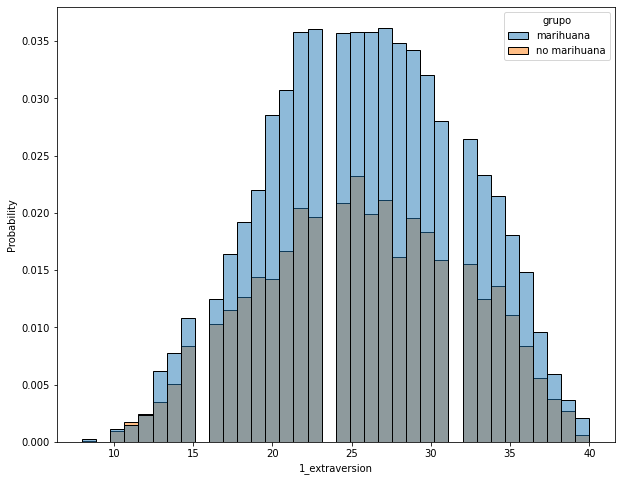

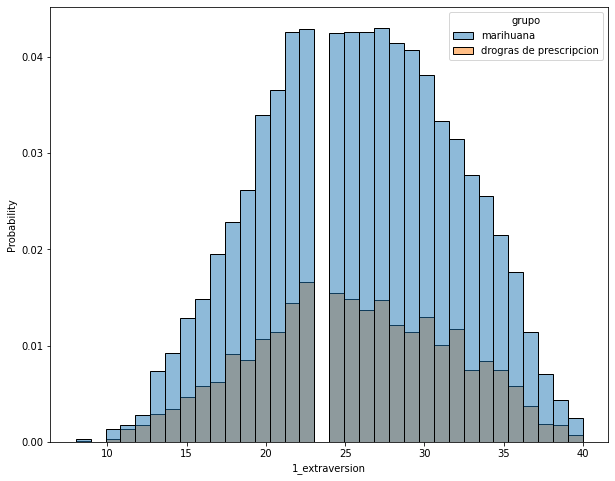

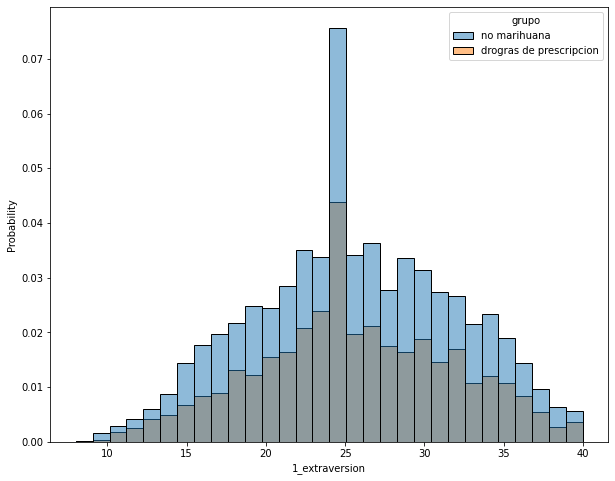



1_agreeableness


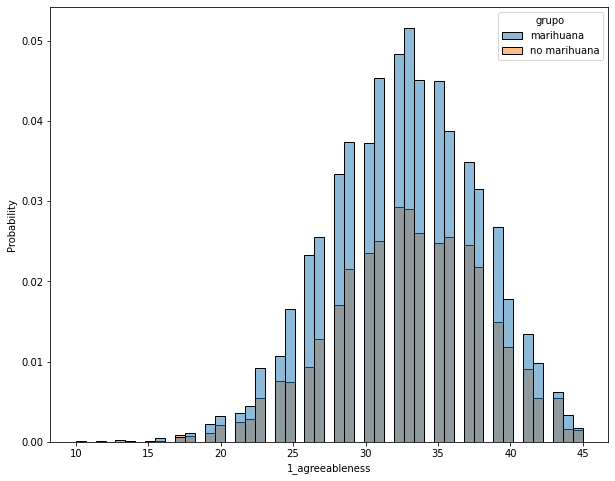

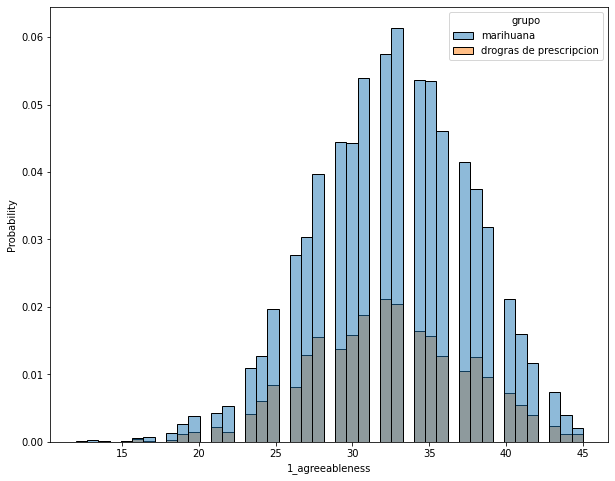

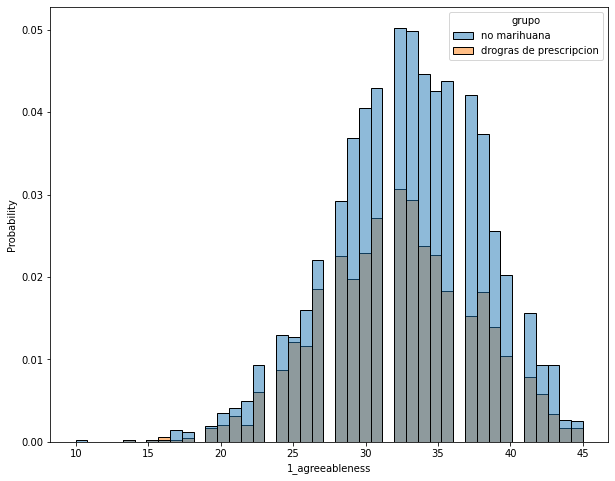



1_conscientiousness


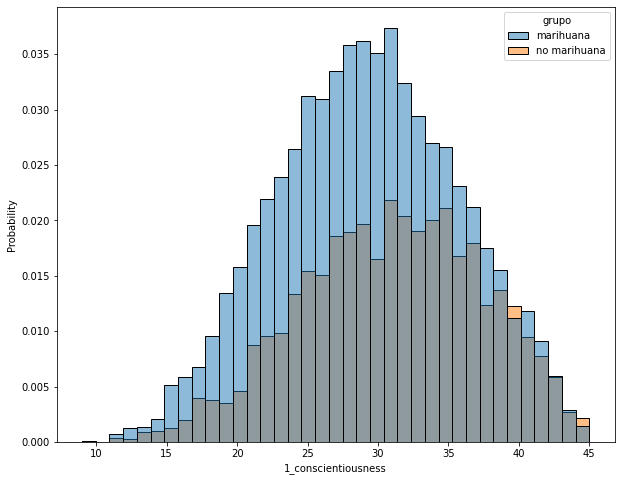

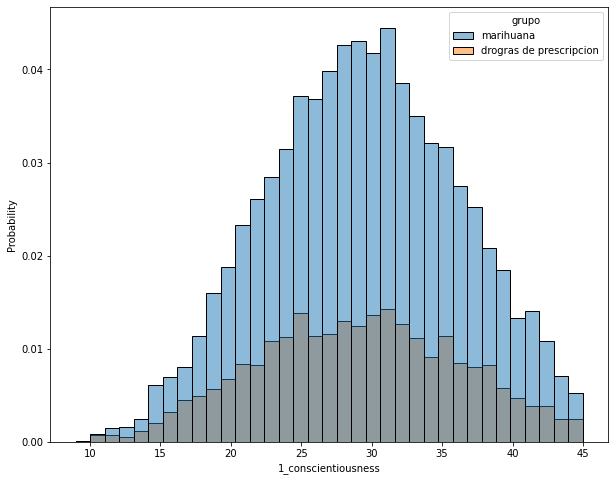

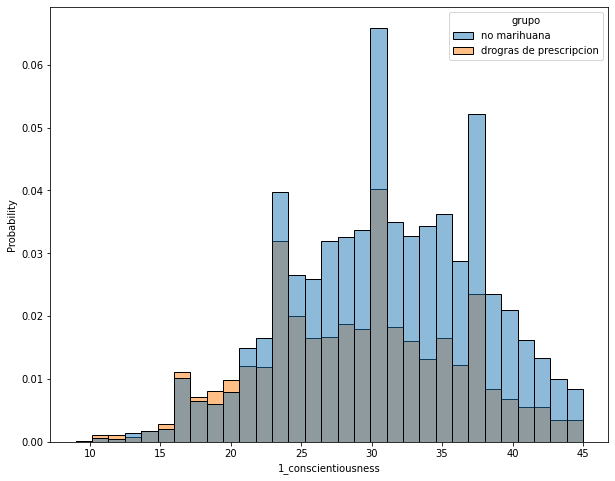



1_neuroticism


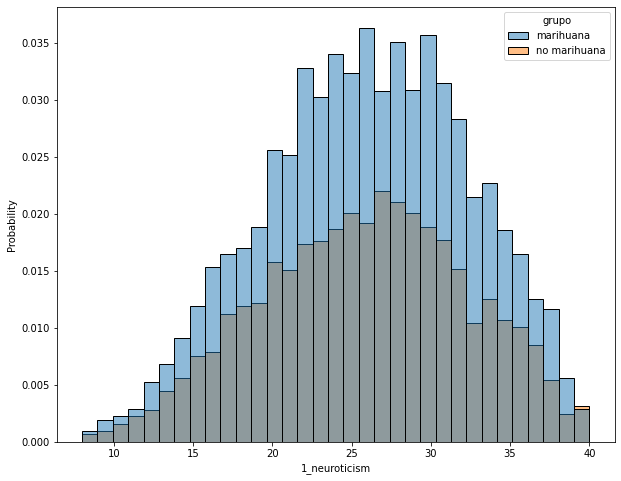

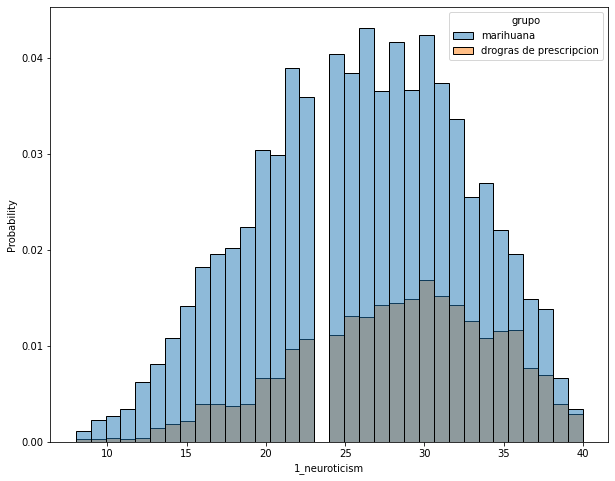

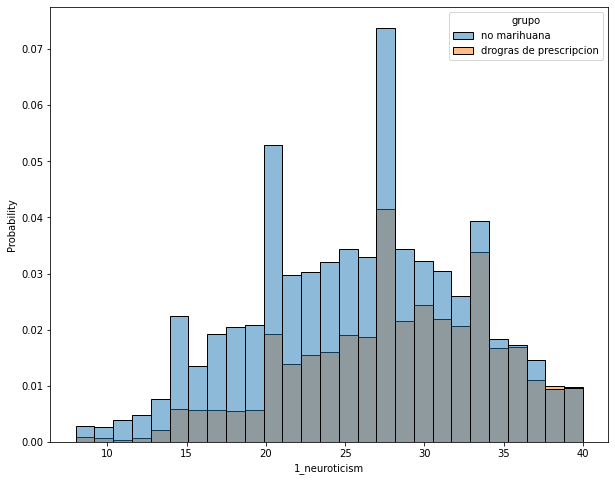



1_openness


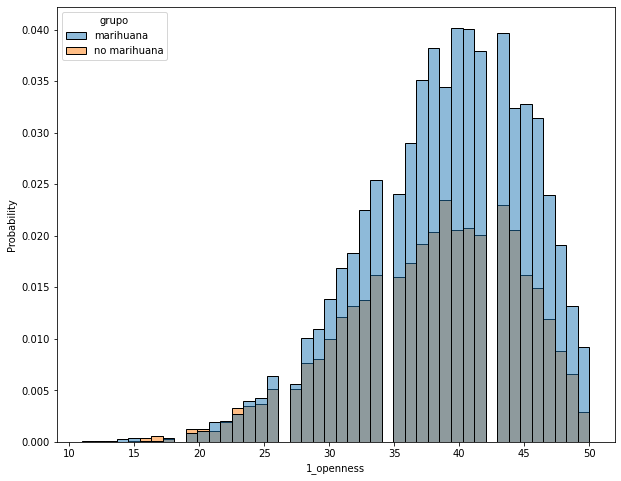

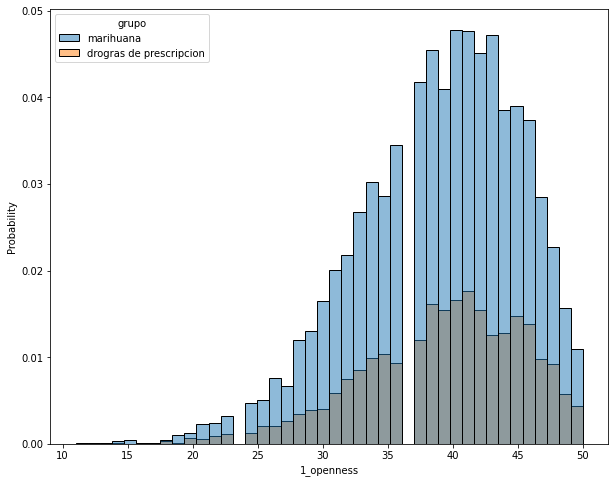

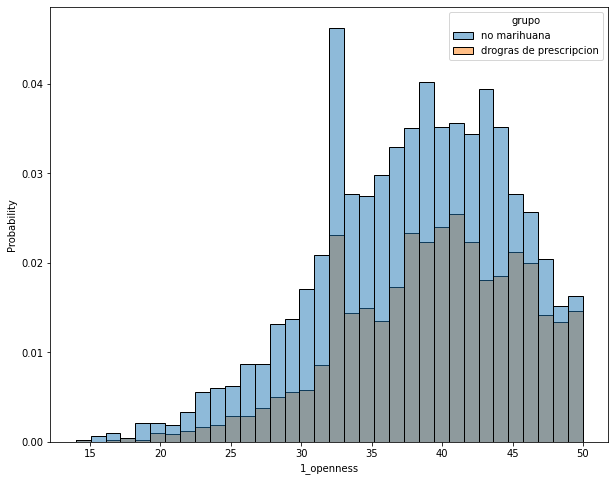

In [ ]:
#PASO 5: Diferencias aparentes graficadas a partir de Seaborn

#Pongo una columna "grupo" con valores fijos
df_M_dims["grupo"] = "marihuana"
df_NM_dims["grupo"] = "no marihuana"
df_DP_dims["grupo"] = "drogras de prescripcion"

#Concateno algunos dataframes
df_MyNM = df_M_dims.append(df_NM_dims)
df_MyDP = df_M_dims.append(df_DP_dims)
df_NMyDP = df_NM_dims.append(df_DP_dims)


#Grafico los histogramas para todas las dimensiones de la personalidad
import seaborn as sbn

for dim in columnas:
    print(dim)
    fig, ax = plt.subplots(figsize = (10,8))
    sbn.histplot(data=df_MyNM, x=dim, hue="grupo", stat="probability")
    fig, ax = plt.subplots(figsize = (10,8))
    sbn.histplot(data=df_MyDP, x=dim, hue="grupo", stat="probability")
    fig, ax = plt.subplots(figsize = (10,8))
    sbn.histplot(data=df_NMyDP, x=dim, hue="grupo", stat="probability")
    plt.show()
    print("\n")
    
  

In [ ]:
#PASO 6: Cálculo del tamaño de efecto de la diferencia entre la dimensión de personalidad y los grupos elegidos usando la D de Cohen

#Calculo el valor medio y desviación estándar para '1_extraversion' en los tres grupos

dim = '1_extraversion'
#Grupo 1
mean_M = df_M_dims[dim].mean()
std_M = df_M_dims[dim].std()

#Grupo 2
mean_NM = df_NM_dims[dim].mean()
std_NM = df_NM_dims[dim].std()

#Grupo 3
mean_DP = df_DP_dims[dim].mean()
std_DP = df_DP_dims[dim].std()

#Calculo la D de Cohen para los M y NM
D_Cohen = np.abs(mean_M-mean_NM)/(np.sqrt(std_M**2 + std_NM**2)/2)
print("D de Cohen para {} = {}".format(dim,D_Cohen))



D de Cohen para 1_extraversion = 0.07026747598156642
